# **TTI109 - Estatística**
# **Aula 13 - Intervalos de Confiança 01**

Nessa aula vamos aprender a:

* Emprergar estimativas intervalares para estimar o valor de um parâmetro populacional, segundo um nível de confiança previamente estabelecido;
* Calcular o valor máximo para o erro a partir do nível de confiança e da distribuição amostral da variável;
* Calcular o tamanho mínimo de uma amostra para garantir um deterniando nível de confiança dentro de uma margem de erro pré-estabelecida;
* Construir um intervalo de confiança para a média populacional no caso em que o desvio padrão populacional é conhecido;
* Empregar a distribuição *t* para construir um intervalo de confiança para a média populacional no caso em que o desvio padrão populacional é desconhecido.

## **Fluxograma decisório para construção de intervalos de confiança para a média populacional**

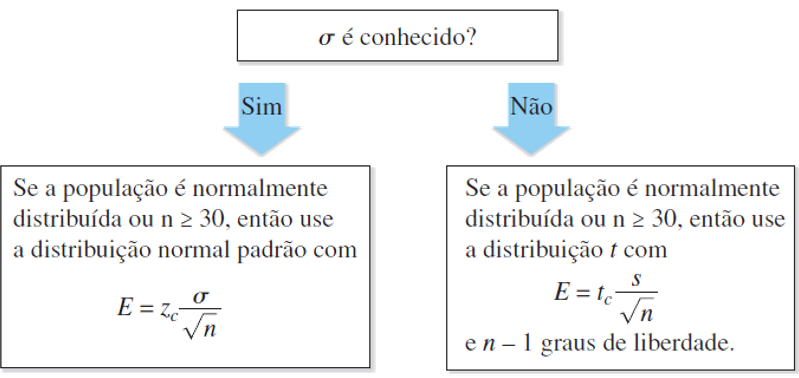

## **Estimativa pontual de parâmetro populacional**

Uma nova amostra aleatória de horas semanais trabalhadas por 30 funcionários
de mercearias é mostrada na tabela a seguir:

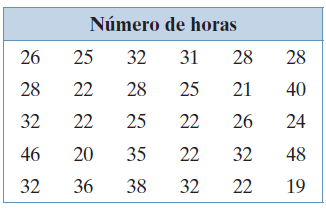

Use essa amostra para encontrar outra estimativa pontual para a média populacional $\mu$.

In [1]:
# Biblioteca necessária
import pandas as pd

In [2]:
# Dados amostrais
horas = pd.Series([26, 28, 32, 46, 32, 25, 22, 22, 20, 36,
                   32, 28, 25, 35, 38, 31, 25, 22, 22, 32,
                   28, 21, 26, 32, 22, 28, 40, 24, 48, 19])

In [3]:
# Estimativa da média populacional
x_barra = horas.mean()
print('*** Estimativa da média populacional ***')
print(f'Estimativa da jornada semanal média de trabalho = {x_barra:.1f} horas.')

*** Estimativa da média populacional ***
Estimativa da jornada semanal média de trabalho = 28.9 horas.


## **Intervalo de confiança para a média, com $\sigma$ conhecido**

Use os dados do da célula anterior para construir um intervalo de
confiança de 95% para o número médio de horas semanais trabalhadas
por funcionários de mercearias. Suponha que o desvio padrão da população
seja de 7,9 horas.

In [4]:
# Biblioteca necessária
from scipy import stats as st

In [5]:
# Desvio padrão populacional conhecido
sigma = 7.9

# Nível de confiança adotado
confianca = 0.95

# Desvio padrão da distribuiução normal das médias amostrais (Erro padrão)
n_amostras = 30
sigma_x = sigma/n_amostras**0.5

In [6]:
# Intervalo de confiança de 95% para a média populacional
# Desvio padrão populacional conhecido

int_confianca = st.norm.interval(confidence=confianca, loc=x_barra, scale=sigma_x)
print('*** Intervalo de conficança 95% para a média populacional ***')
print(f'--> Desvio padrão populacional conhecido: {sigma} horas')
print(f'--> Intervalo de confiança: ({int_confianca[0]:.1f}, {int_confianca[1]:.1f}) horas')

*** Intervalo de conficança 95% para a média populacional ***
--> Desvio padrão populacional conhecido: 7.9 horas
--> Intervalo de confiança: (26.1, 31.7) horas


*Interpretação:* Com $95\%$ de confiança, a jornada média semanal de trabalho dos funcionários de mercearias está entre $26,1$ e $31,7$ horas.

## **Alterando o nível de confiança**

Use os dados do exemplo anterior para construir intervalos de confiança de $75\%$, $85\%$ e $90\%$ para o número médio de horas trabalhadas por funcionários de mercearias.

Como muda a largura do intervalo de confiança à medida que o nível de confiança aumenta?

In [7]:
# Biblioteca necessária
import matplotlib.pyplot as plt

In [8]:
# Níveis de confiança
niveis = [0.75, 0.85, 0.90]

# Intervalos de confiança para a média populacional
# Desvio padrão populacional conhecido
intervalos = [st.norm.interval(confidence=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]

# Exibição dos intervalos
print('*** Intervalos de confiança para a média populacional ***')
print(f'--> Desvio padrão populacional conhecido: {sigma} horas')
for i in range(len(niveis)):
  print(f'--> Intervalo de confiança {niveis[i]*100}% = ({intervalos[i][0]:.1f}, {intervalos[i][1]:.1f}) horas')

*** Intervalos de conficança para a média populacional ***
--> Desvio padrão populacional conhecido: 7.9 horas
--> Intervalo de confiança 75.0% = (27.2, 30.6) horas
--> Intervalo de confiança 85.0% = (26.8, 31.0) horas
--> Intervalo de confiança 90.0% = (26.5, 31.3) horas


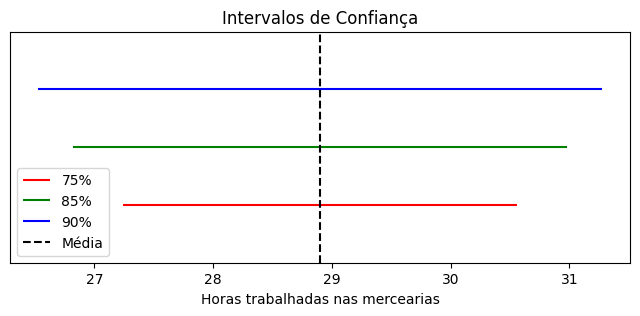

In [9]:
## Construção gráfica

# Constantes
ALTURAS = [0.5, 1, 1.5]
CORES = ['r', 'g', 'b']

# Plotando linhas horizontais
plt.figure(figsize=(8,3))
for i in range(len(niveis)):
  plt.hlines(ALTURAS[i], intervalos[i][0], intervalos[i][1], colors=CORES[i])

# Atributos do gráfico
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 2)
plt.vlines(x_barra, 0, 2, colors='k', linestyles='dashed')
plt.title('Intervalos de Confiança')
plt.xlabel('Horas trabalhadas nas mercearias')
plt.legend(['75%', '85%', '90%','Média'], loc='lower left')
plt.show()

## **Intervalo de confiança para a média, com $\sigma$ desconhecido**

###**Exemplo 01**###
Você seleciona aleatoriamente 16 cafeterias e mede a temperatura do café vendido em cada uma delas. A temperatura média da amostra é 162,0 ºF com desvio padrão de 10,0 ºF.

Construa os intervalos de confiança de 90% e 99% para a temperatura
média da população de cafés vendidos.

In [10]:
# Níveis de confiança
niveis = [0.90, 0.99]

# Atributos da distribuição
x_barra, std_amostral = 162, 10
num_amostras = 16
graus_liberdade = num_amostras - 1

In [13]:
# Intervalo de confiança para a média populacional
intervalos = [st.t.interval(confidence=nivel, df=graus_liberdade, loc=x_barra,
                            scale=std_amostral/num_amostras**0.5) for nivel in niveis]
# Exibição dos intervalos
print('*** Intervalos de confiança para a média populacional ***')
print('--> Desvio padrão populacional desconhecido')
for i in range(len(niveis)):
  print(f'--> Intervalo de confiança {niveis[i]*100}% = ({intervalos[i][0]:.1f}, {intervalos[i][1]:.1f}) °F')

*** Intervalos de conficança para a média populacional ***
--> Desvio padrão populacional desconhecido
--> Intervalo de confiança 90.0% = (157.6, 166.4) °F
--> Intervalo de confiança 99.0% = (154.6, 169.4) °F


###**Exemplo 02**###

Você seleciona aleatoriamente 36 carros do mesmo modelo que foram
vendidos em uma concessionária, e determina o número de dias
que cada um permaneceu no pátio da concessionária antes de ser vendido.
A média amostral é de 9,75 dias, com um desvio padrão amostral
de 2,39 dias. Construa um intervalo de confiança de 99% para o número
médio populacional de dias que um carro permanece no pátio da
concessionária.

In [14]:
# Nível de confiança
nivel = 0.99

# Atributos da distribuição
x_barra, std_amostral = 9.75, 2.39
num_amostras = 36
graus_liberdade = num_amostras - 1

In [18]:
# Intervalo de confiança
intervalo = st.t.interval(confidence=nivel, df=graus_liberdade, loc=x_barra,
                          scale=std_amostral/num_amostras**0.5)
print('*** Intervalo de confiança para a média populacional ***')
print('--> Desvio padrão populacional desconhecido')
print(f'--> Intervalo de confiança {nivel*100}% = ({intervalo[0]:.2f}, {intervalo[1]:.2f}) dias')

*** Intervalo de confiança para a média populacional ***
--> Desvio padrão populacional desconhecido
--> Intervalo de confiança 99.0% = (8.67, 10.83) dias


###**Exemplo 03**###

Considere o conjunto de dados a seguir (amostra de uma população). Construa um intervalo de confiança com 95% de confiança que contenha a média poulacional. Assuma que a população é normalmente distribuída.

*NOTA:* Para estimar o erro padrão da média ($s/\sqrt{n}$), use o método `sem` (standard error of the mean) do módulo `stats`.

In [19]:
# Biblioteca necessária
import numpy as np

In [20]:
# Dados amostrais
amostras = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
            3, 4, 4, 5, 5, 5, 6, 7, 8, 10]

In [21]:
# Nível de confiança
nivel = 0.95

# Atributos da distribuição
x_barra = np.mean(amostras)
erro_padrao = st.sem(amostras)
num_amostras = 20
graus_liberdade = num_amostras - 1

In [23]:
# Intervalo de confiança
intervalo = st.t.interval(confidence=nivel, df=graus_liberdade,
                          loc=x_barra, scale=erro_padrao)
print('*** Intervalo de confiança para a média populacional ***')
print('--> Desvio padrão populacional desconhecido')
print(f'--> Intervalo de confiança {nivel*100}% = ({intervalo[0]:.2f}, {intervalo[1]:.2f})')

*** Intervalo de confiança para a média populacional ***
--> Desvio padrão populacional desconhecido
--> Intervalo de confiança 95.0% = (2.76, 5.04)


###**Exemplo 04**###
Neste exemplo, investigaremos os dados sobre os hábitos de sono das crianças. Os 20 participantes dessas observações eram saudáveis, tinham comportamento normal e não apresentavam nenhum distúrbio do sono. Nosso objetivo é analisar a hora de dormir de crianças que cochilam e não cochilam durante o dia.

Para isso, criaremos intervalos de confiança de 95% para a média da hora de dormir para crianças que cochilam durante o dia e para aquelas que não cochilam.

*NOTA:* Os horários estão decimados!

In [24]:
# Download do conjunto de dados - arquivo nap_no_nap.csv
%%capture
!gdown --id 1Bh723j4WHb9_Mn7W6npYccn302HIlrTJ

In [34]:
# Dados armazenados no DataFrame soneca
soneca = pd.read_csv('nap_no_nap.csv', encoding='utf-8')
soneca.sample(10)

,id,sex,age (months),dlmo time,days napped,napping,nap lights outl time,nap sleep onset,nap midsleep,nap sleep offset,...,sleep onset latency,night midsleep time,night wake time,night sleep duration,night time in bed,24 h sleep duration,bedtime phase difference,sleep onset phase difference,midsleep phase difference,wake time phase difference
16,17,female,33.7,20.33,5,1,13.15,13.87,14.49,15.11,...,0.60,2.44,7.86,649.8,708.6,724.00,-0.10,-0.70,6.12,11.53
10,11,male,32.9,18.79,4,1,13.99,14.03,14.85,15.68,...,0.44,1.34,6.80,655.2,694.8,753.95,-0.66,-1.09,6.55,12.01
4,5,female,33.0,19.52,0,0,NaN,NaN,NaN,NaN,...,0.45,1.30,6.95,678.0,718.0,678.00,0.31,-0.13,5.78,11.43
17,18,male,36.4,20.16,5,1,12.47,12.56,13.30,14.05,...,0.43,1.23,6.01,573.6,614.6,663.40,0.14,-0.29,5.07,9.85
0,1,female,33.7,19.24,0,0,NaN,NaN,NaN,NaN,...,0.23,1.92,7.17,629.4,643.0,629.40,-1.21,-1.44,6.68,11.93
13,14,female,35.6,19.88,4,1,12.68,13.08,13.92,14.76,...,0.54,1.96,7.11,618.8,671.2,719.55,-0.38,-0.92,6.08,11.23
3,4,female,31.6,19.69,0,0,NaN,NaN,NaN,NaN,...,0.05,1.89,8.28,766.6,784.0,766.60,0.23,0.19,6.20,12.59
7,8,male,30.0,21.06,5,1,13.09,13.43,14.44,15.46,...,0.51,2.92,7.31,526.8,582.4,648.40,-0.95,-1.47,5.86,10.25
11,12,female,35.0,19.65,5,1,13.18,13.45,14.33,15.21,...,0.66,1.93,7.03,611.2,660.4,717.00,-0.53,-1.19,6.28,11.38
12,13,male,35.1,19.83,3,1,13.94,14.48,15.26,16.03,...,0.67,1.99,7.09,611.8,662.2,705.13,-0.39,-1.06,6.16,11.26


In [35]:
# Isolando as colunas de análise
hora_dormir_cochila = soneca['night bedtime'].loc[soneca['napping'] == 1]
hora_dormir_nao_cochila = soneca['night bedtime'].loc[soneca['napping'] == 0]

In [38]:
# Determinando as médias amostrais
cochila_hora_dormir_media = hora_dormir_cochila.mean()
nao_cochila_hora_dormir_media = hora_dormir_nao_cochila.mean()

# Mostrando as médias amostrais
print(f'Média da hora de dormir das crianças que cochilam = {cochila_hora_dormir_media:.1f} horas')
print(f'Média da hora de dormir das crianças que não cochilam = {nao_cochila_hora_dormir_media:.1f} horas')

Média da hora de dormir das crianças que cochilam = 20.3 horas
Média da hora de dormir das crianças que não cochilam = 19.6 horas


In [39]:
# Determinando os erros padrão para cada caso
erro_pad_cochila = st.sem(hora_dormir_cochila)
erro_pad_nao_cochila = st.sem(hora_dormir_nao_cochila)

In [40]:
# Nível de confiança
nivel = 0.95

# Graus de liberdade
graus_liberdade = len(hora_dormir_cochila) - 1

In [43]:
# Intervalos de confiança
int_cochila = st.t.interval(confidence=nivel, df=graus_liberdade,
                            loc=cochila_hora_dormir_media, scale=erro_pad_cochila)
int_nao_cochila = st.t.interval(confidence=nivel, df=graus_liberdade,
                            loc=nao_cochila_hora_dormir_media, scale=erro_pad_nao_cochila)

# Mostrando os intervalos
print('*** Intervalo de confiança para a média populacional - Hora de dormir***')
print('--> Desvio padrão populacional desconhecido')
print(f'--> Intervalo de confiança {nivel*100}% para crianças que cochilam = ({int_cochila[0]:.2f}, {int_cochila[1]:.2f})')
print(f'--> Intervalo de confiança {nivel*100}% para crianças que não cochilam = ({int_nao_cochila[0]:.2f}, {int_nao_cochila[1]:.2f})')

*** Intervalo de confiança para a média populacional - Hora de dormir***
--> Desvio padrão populacional desconhecido
--> Intervalo de confiança 95.0% para crianças que cochilam = (19.98, 20.63)
--> Intervalo de confiança 95.0% para crianças que não cochilam = (19.10, 20.08)
